# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

merged_df = mouse_df.merge(study_df, how='right', on = 'Mouse ID')

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [34]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_id = duplicate['Mouse ID'].unique()
duplicate_id


array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for item in duplicate_id:
    merged_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == item].index)
        
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [38]:
# Checking the number of mice in the clean DataFrame.
len(merged_df["Mouse ID"].unique())

248

## Summary Statistics

In [39]:
avg_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()


med_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()


var_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()


std_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()


sem_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


avg_tumor = pd.DataFrame(avg_tumor).reset_index()
avg_tumor.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"}, inplace = True)

med_tumor = pd.DataFrame(med_tumor).reset_index()
med_tumor.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"}, inplace = True)

var_tumor = pd.DataFrame(var_tumor).reset_index()
var_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace = True)

std_tumor = pd.DataFrame(std_tumor).reset_index()
std_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace = True)

sem_tumor = pd.DataFrame(sem_tumor).reset_index()
sem_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace = True)



df1 = avg_tumor.merge(med_tumor, how = 'right')
df1
df2 = df1.merge(var_tumor, how = 'right')
df2
df3 = df2.merge(std_tumor, how = 'right')
df3
summary_df = df3.merge(sem_tumor, how = 'right')




In [40]:
summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_table = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table_df = pd.DataFrame(summary_table)
summary_table_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table_df = pd.DataFrame(summary_table)
summary_table_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [43]:
time_counts = merged_df.groupby("Drug Regimen")["Timepoint"].count()

time_counts_df = pd.DataFrame(time_counts)
time_counts_df = time_counts_df.reset_index()
time_counts_df = time_counts_df.sort_values(by = 'Timepoint', ascending = False)
time_counts_df


,Drug Regimen,Timepoint
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


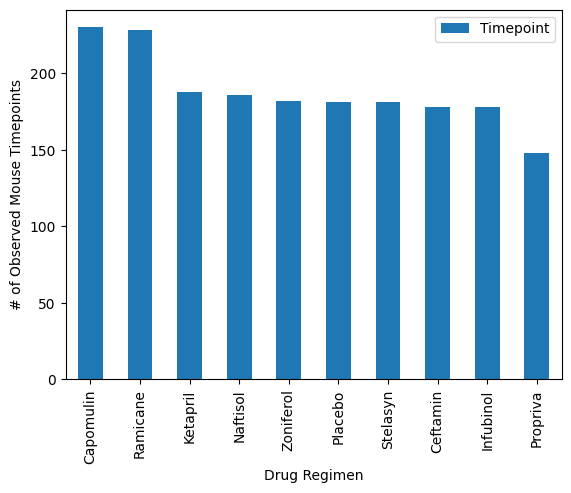

In [44]:
time_counts_df.plot.bar(x='Drug Regimen', y='Timepoint', ylabel = '# of Observed Mouse Timepoints');

<Axes: xlabel='Drug Regimen'>

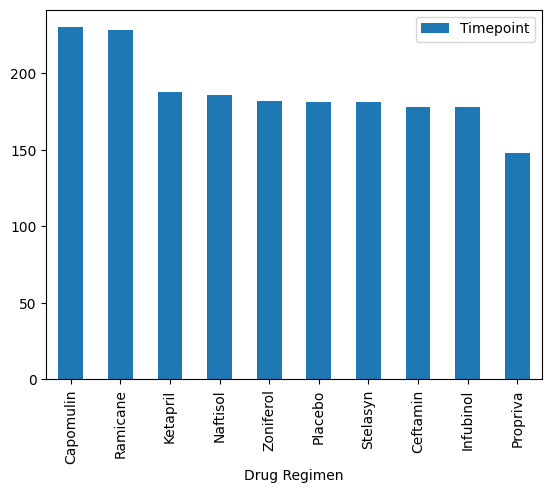

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_counts_df.plot(x="Drug Regimen", y="Timepoint", kind = 'bar')

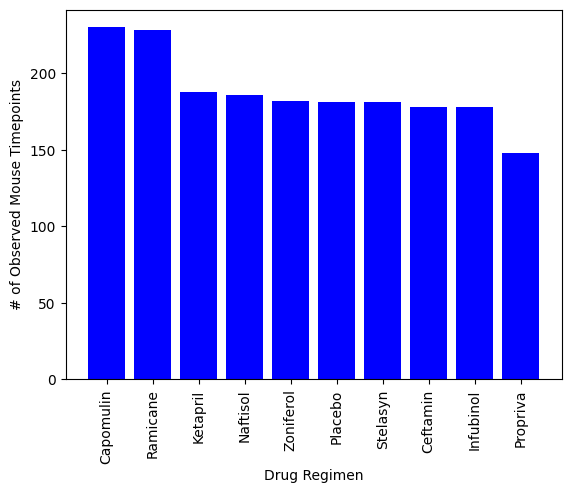

In [46]:
drug = time_counts_df["Drug Regimen"].tolist()
timepoints = time_counts_df["Timepoint"].tolist()

plt.bar(drug, timepoints, color = "blue", width = 0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show;

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



In [48]:
sex_distribution = pd.DataFrame(merged_df.value_counts("Sex"))

sex_distribution

,count
Sex,
Male,958
Female,922


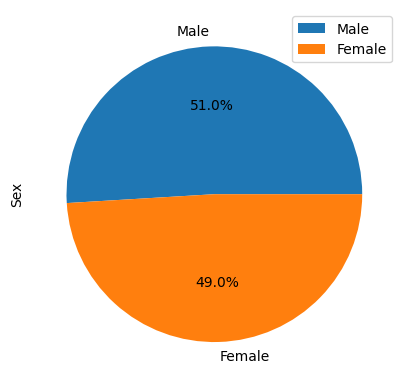

In [49]:
sex_distribution.plot.pie(y = 'count', ylabel = 'Sex', autopct='%1.1f%%');

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


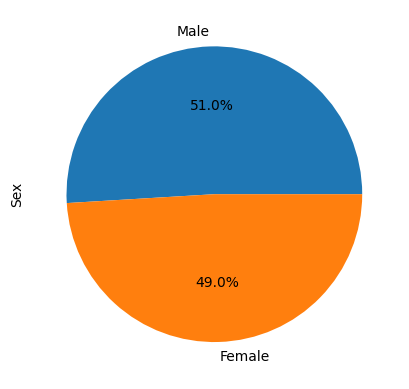

In [51]:
sex_distribution2 = sex_distribution.reset_index()
plt.pie(sex_distribution2['count'], labels = sex_distribution2['Sex'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show();

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df = max_timepoint_df.reset_index()
max_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = max_timepoint_df.merge(merged_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
new_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


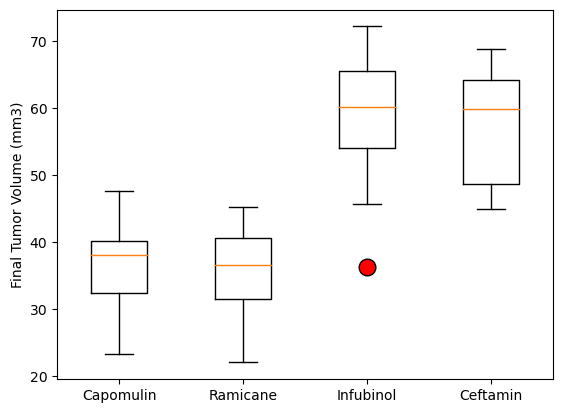

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

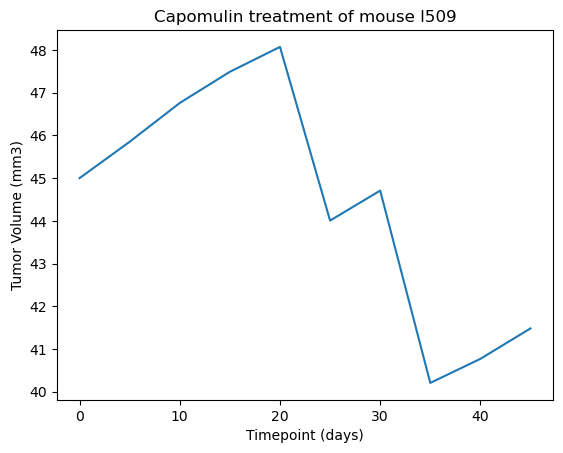

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


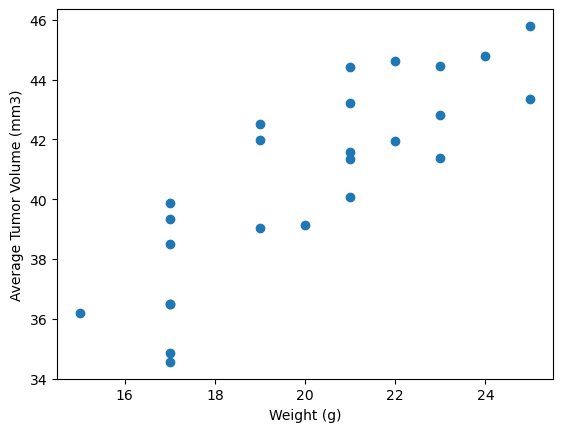

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


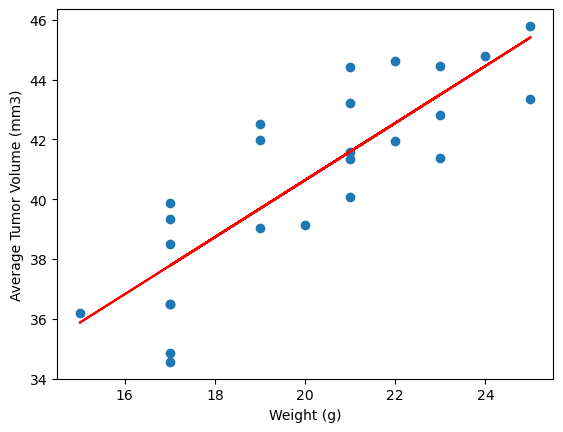

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
